In [19]:
import numpy as np
import random
import pandas as pd

# Function to read cities from a CSV file using pandas
def read_cities_from_csv(file_path):
    df = pd.read_csv(file_path)
    return df.to_numpy()

# Function to calculate total distance of a tour
def calculate_distance(cities, tour):
    distance = 0
    for i in range(len(tour)):
        distance += np.linalg.norm(cities[tour[i - 1]] - cities[tour[i]])
    distance += np.linalg.norm(cities[tour[1]] - cities[tour[0]])
    return distance

# Nearest Neighbor algorithm for TSP
def nearest_neighbor_tsp(cities):
    num_cities = len(cities)
    start_city = np.random.randint(num_cities)  # Start from a random city
    tour = [start_city]
    visited = set(tour)

    while len(visited) < num_cities:
        current_city = cities[tour[-1]]
        nearest_neighbor = None
        min_distance = float('inf')
        for i, city in enumerate(cities):
            if i not in visited:
                distance = np.linalg.norm(city - current_city)
                if distance < min_distance:
                    nearest_neighbor = i
                    min_distance = distance
        tour.append(nearest_neighbor)
        visited.add(nearest_neighbor)

    return tour, calculate_distance(cities, tour)

# Function to apply a sequence of swap operations (velocity) to a tour
def apply_velocity(tour, velocity):
    new_tour = tour.copy()
    num_cities = len(tour)
    for swap in velocity:
        i, j = int(swap[0]), int(swap[1])
        if 0 <= i < num_cities and 0 <= j < num_cities:
            new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
    return new_tour


# PSO algorithm with Nearest Neighbor initialization
def pso_tsp_with_nn(cities, num_particles=100, iterations=100, w=0.5, c1=1.5, c2=1.5):
    num_cities = len(cities)
    # Initialize particles with Nearest Neighbor tours
    particles = [nearest_neighbor_tsp(cities)[0] for _ in range(num_particles)]
    velocities = [np.zeros((num_cities, num_cities)) for _ in range(num_particles)]
    personal_best = particles.copy()
    personal_best_distances = [calculate_distance(cities, p) for p in personal_best]
    global_best = min(personal_best, key=lambda x: calculate_distance(cities, x))
    global_best_distance = calculate_distance(cities, global_best)

    for iteration in range(iterations):
        for i in range(num_particles):
            # Generate random numbers for randomness
            r1, r2 = random.random(), random.random()
            # Update velocities based on personal and global bests
            velocities[i] = (w * velocities[i] +
                             c1 * r1 * (np.array(personal_best[i]) - np.array(particles[i])) +
                             c2 * r2 * (np.array(global_best) - np.array(particles[i])))

            # Apply velocity to particle
            particles[i] = apply_velocity(particles[i], velocities[i])

            # Update personal bests
            current_distance = calculate_distance(cities, particles[i])
            if current_distance < personal_best_distances[i]:
                personal_best[i] = particles[i]
                personal_best_distances[i] = current_distance

        # Update global best
        current_global_best = min(personal_best, key=lambda x: calculate_distance(cities, x))
        current_global_best_distance = calculate_distance(cities, current_global_best)
        if current_global_best_distance < global_best_distance:
            global_best = current_global_best
            global_best_distance = current_global_best_distance

    global_best.append(global_best[0])

    return global_best, global_best_distance






In [20]:
# Simulated Annealing algorithm with Nearest Neighbor initialization
def simulated_annealing_tsp_with_nn(cities, initial_temp=1000, cooling_rate=0.99, iterations=1000):
    # Start with a Nearest Neighbor tour
    current_solution, current_distance = nearest_neighbor_tsp(cities)
    best_solution = current_solution
    best_distance = current_distance
    temperature = initial_temp

    for _ in range(iterations):
        # Generate a neighbor tour by swapping two cities
        neighbor = current_solution.copy()
        swap_indices = np.random.choice(len(neighbor), 2, replace=False)
        neighbor[swap_indices[0]], neighbor[swap_indices[1]] = neighbor[swap_indices[1]], neighbor[swap_indices[0]]

        # Calculate the neighbor's distance
        neighbor_distance = calculate_distance(cities, neighbor)

        # Decide whether to accept the neighbor
        if neighbor_distance < current_distance or np.random.rand() < np.exp((current_distance - neighbor_distance) / temperature):
            current_solution = neighbor
            current_distance = neighbor_distance

            # Update the best solution found
            if neighbor_distance < best_distance:
                best_solution = neighbor
                best_distance = neighbor_distance

        # Cool down the temperature
        temperature *= cooling_rate
    best_solution.append(best_solution[0])
    return best_solution, best_distance

In [22]:
# Example usage
file_path = 'large.csv'
cities = read_cities_from_csv(file_path)

# Run the modified PSO algorithm
best_tour_pso, best_distance_pso = pso_tsp_with_nn(cities)
print("PSO Best tour:", best_tour_pso)
print("PSO Best distance:", best_distance_pso)

# Run the modified Simulated Annealing algorithm
best_tour_sa, best_distance_sa = simulated_annealing_tsp_with_nn(cities)
print("Simulated Annealing Best tour:", best_tour_sa)
print("Simulated Annealing Best distance:", best_distance_sa)

# Compare the results
if best_distance_pso < best_distance_sa:
    print("PSO found a better solution.")
elif best_distance_pso > best_distance_sa:
    print("Simulated Annealing found a better solution.")
else:
    print("Both algorithms found solutions with equal distance.")



PSO Best tour: [362, 648, 394, 244, 324, 182, 732, 616, 106, 759, 747, 389, 327, 88, 638, 236, 808, 180, 317, 552, 302, 990, 423, 848, 615, 868, 174, 968, 238, 421, 29, 32, 672, 503, 221, 565, 719, 528, 568, 731, 370, 97, 425, 152, 718, 147, 31, 804, 634, 72, 640, 207, 172, 387, 312, 163, 525, 911, 544, 957, 13, 658, 150, 98, 631, 430, 61, 510, 886, 356, 815, 197, 594, 164, 509, 216, 431, 972, 80, 184, 146, 700, 933, 915, 135, 71, 637, 250, 891, 606, 249, 703, 716, 158, 25, 73, 499, 507, 785, 240, 34, 790, 380, 489, 824, 991, 15, 645, 875, 376, 33, 936, 669, 636, 232, 865, 938, 92, 823, 375, 769, 690, 52, 728, 266, 159, 345, 339, 758, 774, 449, 47, 592, 998, 942, 28, 782, 443, 793, 470, 974, 485, 455, 488, 139, 711, 610, 322, 529, 742, 612, 342, 633, 895, 760, 70, 684, 549, 23, 373, 927, 260, 328, 962, 436, 138, 243, 518, 294, 43, 898, 986, 241, 127, 550, 367, 264, 459, 325, 368, 412, 166, 679, 469, 776, 851, 411, 652, 726, 534, 334, 844, 945, 559, 187, 595, 657, 372, 79, 950, 109, 598

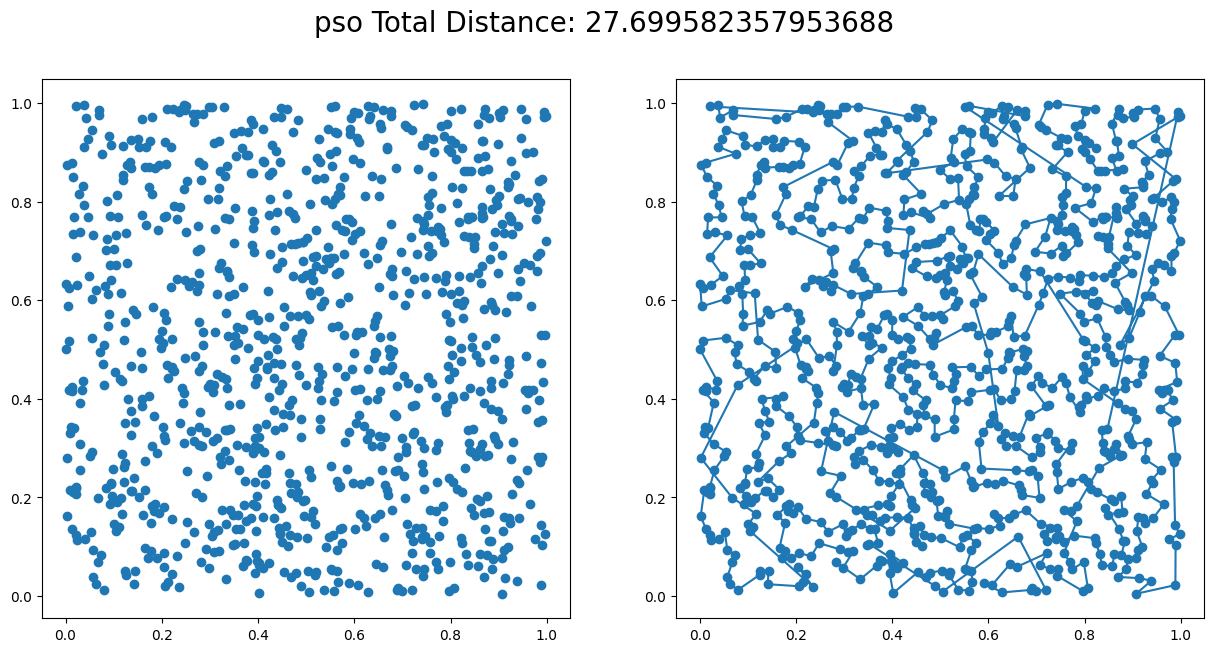

In [23]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def create_figure():
    '''
    Creates a figure which `visualize_solution()` will draw onto.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    return fig, axes

def visualize_solution(cities, solution, fig=None, axes=None, block=True):
    '''
    Visualize the solution in a 2D plot.
    The 'cities' and 'solution' arguments are the same
    as to the `score_solution()` function.
    '''
    dist = best_distance_pso

    if fig is None or axes is None:
        fig, axes = create_figure()
    ax1, ax2 = axes
    fig.suptitle('pso Total Distance: {}'.format(dist), fontsize=20)

    ax1.clear()
    ax1.scatter(cities[:,0], cities[:,1])

    if len(solution) == len(cities):
        path = np.hstack((solution, solution[0]))  # <-- the salesperson has to return home!
    else:
        path = solution
    ax2.clear()
    ax2.plot(cities[path,0], cities[path,1])
    ax2.scatter(cities[:,0], cities[:,1])

    if block:
        while plt.fignum_exists(fig.number):
            plt.pause(0.001)
    else:
        plt.pause(0.001)
        
visualize_solution(cities=cities,solution=best_tour_pso)


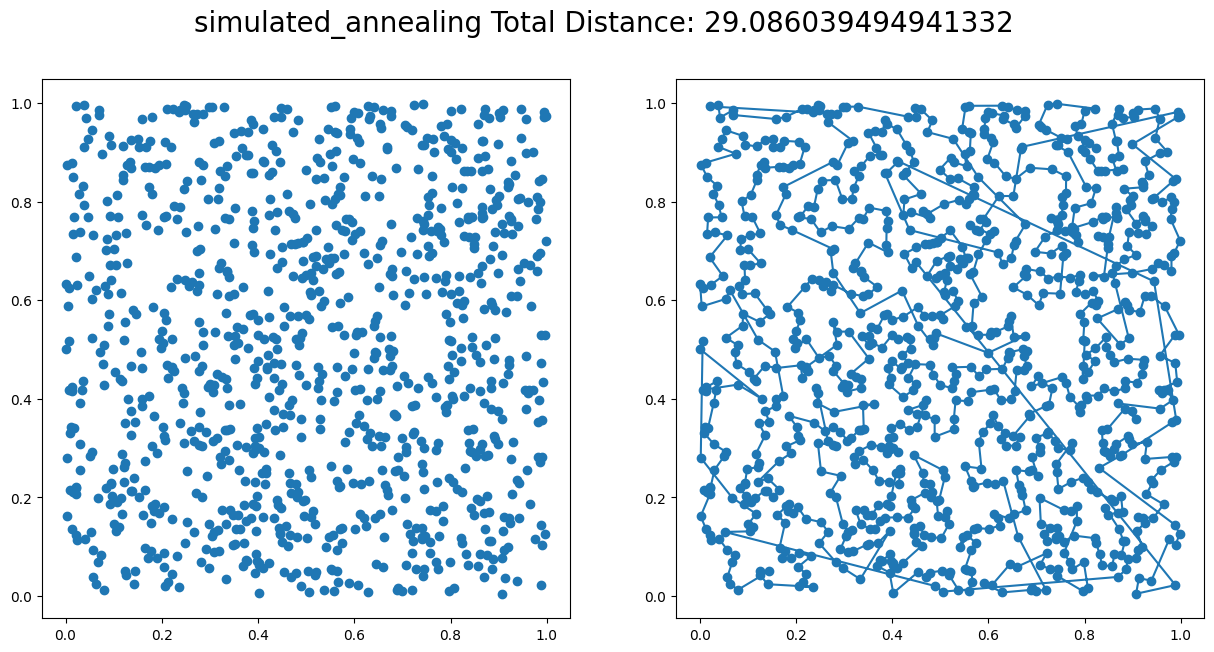

In [24]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def create_figure():
    '''
    Creates a figure which `visualize_solution()` will draw onto.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    return fig, axes

def visualize_solution(cities, solution, fig=None, axes=None, block=True):
    '''
    Visualize the solution in a 2D plot.
    The 'cities' and 'solution' arguments are the same
    as to the `score_solution()` function.
    '''
    dist =  best_distance_sa

    if fig is None or axes is None:
        fig, axes = create_figure()
    ax1, ax2 = axes
    fig.suptitle('simulated_annealing Total Distance: {}'.format(dist), fontsize=20)

    ax1.clear()
    ax1.scatter(cities[:,0], cities[:,1])

    if len(solution) == len(cities):
        path = np.hstack((solution, solution[0]))  # <-- the salesperson has to return home!
    else:
        path = solution
    ax2.clear()
    ax2.plot(cities[path,0], cities[path,1])
    ax2.scatter(cities[:,0], cities[:,1])

    if block:
        while plt.fignum_exists(fig.number):
            plt.pause(0.001)
    else:
        plt.pause(0.001)
        

visualize_solution(cities=cities,solution=best_tour_sa)


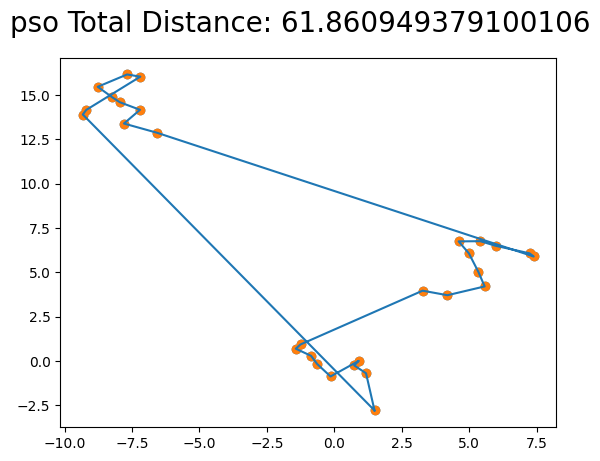

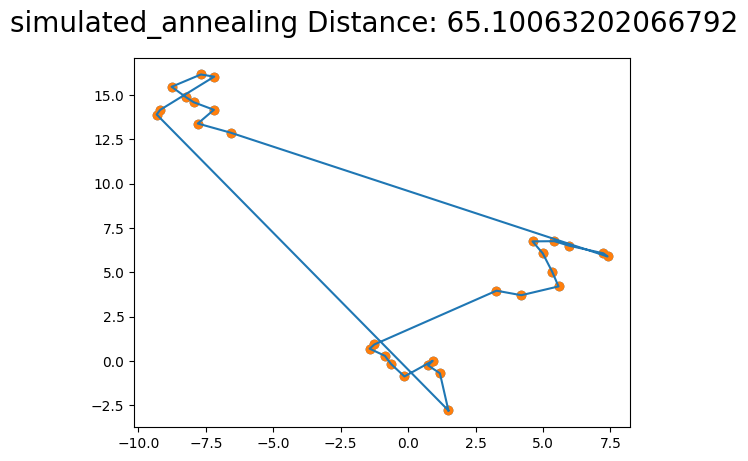

In [ ]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to read cities from a CSV file using pandas
def read_cities_from_csv(file_path):
    df = pd.read_csv(file_path)
    return df.to_numpy()

# Function to calculate total distance of a tour
def calculate_distance(cities, tour):
    distance = 0
    for i in range(len(tour)):
        distance += np.linalg.norm(cities[tour[i - 1]] - cities[tour[i]])
    return distance

# Function to visualize the solution
def visualize_solution_pso(cities, solution,dist):
    fig, ax = plt.subplots()
    ax.scatter(cities[:,0], cities[:,1])
    fig.suptitle('pso Total Distance: {}'.format(dist), fontsize=20)

    if len(solution) == len(cities):
        path = np.hstack((solution, solution[0]))  # The salesperson has to return home
    else:
        path = solution

    ax.plot(cities[path,0], cities[path,1])
    ax.scatter(cities[:,0], cities[:,1])
    plt.show()

# Function to visualize the solution
def visualize_solution_simu(cities, solution,dist):
    fig, ax = plt.subplots()
    ax.scatter(cities[:,0], cities[:,1])
    fig.suptitle('simulated_annealing Distance: {}'.format(dist), fontsize=20)

    if len(solution) == len(cities):
        path = np.hstack((solution, solution[0]))  # The salesperson has to return home
    else:
        path = solution

    ax.plot(cities[path,0], cities[path,1])
    ax.scatter(cities[:,0], cities[:,1])
    plt.show()

# Function to open file dialog and select CSV file
def select_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    entry_path.delete(0, tk.END)
    entry_path.insert(0, file_path)

# Function to run the algorithms and visualize the solution
def run_algorithm():
    file_path = entry_path.get()
    cities = read_cities_from_csv(file_path)

    # Run the PSO algorithm (or any other algorithm)
    best_tour_pso, dist1 = pso_tsp_with_nn(cities)
    best_tour_pso, dist2 = simulated_annealing_tsp_with_nn(cities)
    visualize_solution_pso(cities, best_tour_pso,dist1)
    visualize_solution_simu(cities, best_tour_pso,dist2)

# Create the main application window
root = tk.Tk()
root.title("TSP Solver")

# Create a label
label = tk.Label(root, text="Traveling Salesman Problem Solver")
label.pack()

# Create an entry widget to display the file path
entry_path = tk.Entry(root, width=50)
entry_path.pack()

# Create a button to open file dialog
button_browse = tk.Button(root, text="Browse", command=select_file)
button_browse.pack()

# Create a button to run the algorithm
button_run = tk.Button(root, text="Run Algorithm", command=run_algorithm)
button_run.pack()

# Run the Tkinter event loop
root.mainloop()
